<a href="https://colab.research.google.com/github/Ephraimosse9/Pytorch-course-on-UDEMY--Notes-and-Codes/blob/main/Binary_Classification_MODEL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [16]:
X, Y = make_circles(1000, noise= 0.03, random_state=42)
X.shape, Y.shape

((1000, 2), (1000,))

In [17]:
circles = pd.DataFrame({"X1": X[:,0],"X2": X[:,1],"Label": Y})
circles.head(10)

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [18]:
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)
X[:5], Y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

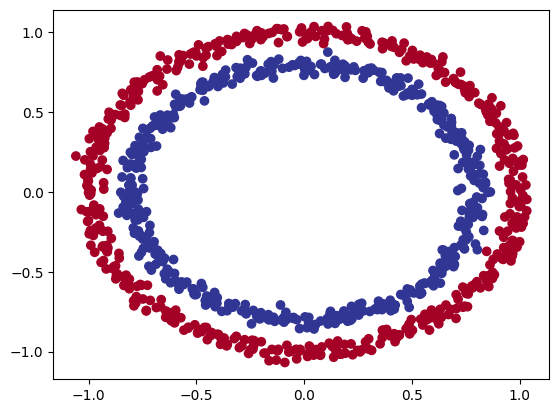

In [19]:
plt.scatter(x=X[:,0], y=X[:,1], c=Y, cmap= plt.cm.RdYlBu)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)
len(X_train), len(Y_train), len(X_test), len(Y_test)

(800, 800, 200, 200)

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class CircularModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.Layer1 = nn.Linear(in_features=2, out_features=128)
    self.Layer2 = nn.Linear(in_features=128, out_features=128)
    self.Layer3 = nn.Linear(in_features=128, out_features=1)
    self.relu = nn.ReLU()


  def forward(self,x):
    return self.Layer3(self.relu(self.Layer2(self.relu(self.Layer1(x)))))

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  return (correct/len(y_pred)) * 100

model_0 =CircularModel()

In [22]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params= model_0.parameters(), lr = 0.1)

epochs = 1000

for epoch in range(epochs):
  model_0.train()
  y_pred_logit_train = model_0(X_train.to(device)).squeeze()
  y_pred_train =torch.round(torch.sigmoid(y_pred_logit_train))
  loss_train =loss_fn(y_pred_logit_train, Y_train.to(device))
  accuracy_train = accuracy_fn(y_true=Y_train, y_pred=y_pred_train)
  optimizer.zero_grad()
  loss_train.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    y_pred_logit_test = model_0(X_test.to(device)).squeeze()
    y_pred_test =torch.round(torch.sigmoid(y_pred_logit_test))
    loss_test =loss_fn(y_pred_logit_test, Y_test.to(device))
    accuracy_test = accuracy_fn(y_true=Y_test, y_pred=y_pred_test)

  if epoch % 100 ==0:
    print(f"Epoch: {epoch} || Training Loss: {loss_train: .5f}, Training Accuracy: {accuracy_train: .2f} || Testing Loss: {loss_test: .5f}, Testing Accuracy: {accuracy_test: .2f}")

Epoch: 0 || Training Loss:  0.69346, Training Accuracy:  47.38 || Testing Loss:  0.68727, Testing Accuracy:  48.00
Epoch: 100 || Training Loss:  0.66629, Training Accuracy:  89.38 || Testing Loss:  0.66919, Testing Accuracy:  88.00
Epoch: 200 || Training Loss:  0.61205, Training Accuracy:  94.75 || Testing Loss:  0.62080, Testing Accuracy:  94.00
Epoch: 300 || Training Loss:  0.48391, Training Accuracy:  99.50 || Testing Loss:  0.49343, Testing Accuracy:  98.00
Epoch: 400 || Training Loss:  0.29055, Training Accuracy:  99.88 || Testing Loss:  0.29633, Testing Accuracy:  100.00
Epoch: 500 || Training Loss:  0.20111, Training Accuracy:  99.38 || Testing Loss:  0.20474, Testing Accuracy:  99.50
Epoch: 600 || Training Loss:  0.10394, Training Accuracy:  99.88 || Testing Loss:  0.11060, Testing Accuracy:  100.00
Epoch: 700 || Training Loss:  0.06478, Training Accuracy:  100.00 || Testing Loss:  0.06959, Testing Accuracy:  100.00
Epoch: 800 || Training Loss:  0.04530, Training Accuracy:  100

In [27]:
with torch.inference_mode():
    y_pred_logit_test = model_0(X_test.to(device)).squeeze()
    y_pred_test =torch.round(torch.sigmoid(y_pred_logit_test))
y_pred_test  == Y_test

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

In [24]:
import requests
import pathlib
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py exists, skipping download


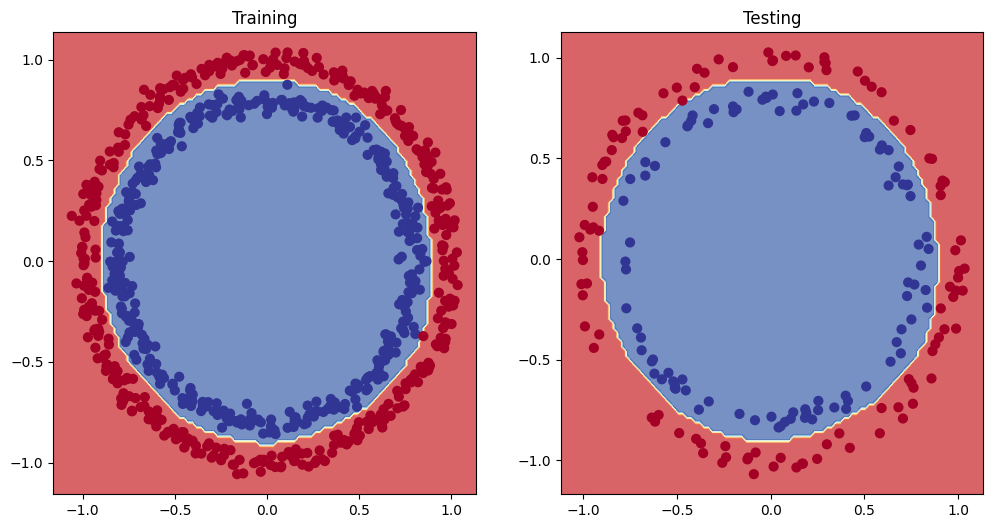

In [26]:

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_0, X_train, Y_train)

plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model_0, X_test, Y_test)

